In [1]:
import numpy as np
from sklearn import model_selection

In [2]:
data = np.loadtxt("data.csv", delimiter=",")

In [3]:
X = data[:, 0]
Y = data[:, 1]

In [4]:
X_train,X_test,Y_train,Y_test= model_selection.train_test_split(X, Y,test_size=0.3)

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(70,)
(70,)
(30,)
(30,)


In [6]:
class LinearRegression2D:
    def __init__(self):
        self.m= 0
        self.c= 0
    
    def fit(self, X_train, Y_train):
        y_mean= Y_train.mean()
        x_mean= X_train.mean()
        xy_mean= (X_train*Y_train).mean()
        x2_mean= (X_train*X_train).mean()
        x_mean2= x_mean*x_mean
        self.m= (xy_mean-x_mean*y_mean)/(x2_mean-x_mean2)
        self.c= y_mean-self.m*x_mean
    
    def predict(self, X_test):
        Y_pred= self.m*X_test + self.c
        return Y_pred
    
    def cost(self, x, y):
        cf= np.mean(( y-self.m*x- self.c)**2)
        return cf
    
    def score(self, Y_truth, Y_pred):
        u= np.sum((Y_truth-Y_pred)**2)
        v= np.sum((Y_truth-Y_truth.mean())**2)
        coeff= 1- (u/v)
        return coeff
    

In [7]:
alg1= LinearRegression2D()
alg1.fit(X_train,Y_train)

In [8]:
print(f"M is {alg1.m} and c is {alg1.c}")

M is 1.3847459918746563 and c is 4.171000090426489


In [9]:
# test data
y_test_pred = alg1.predict(X_test)
print("Test Score: ",alg1.score(Y_test, y_test_pred))

#train data
y_train_pred = alg1.predict(X_train)
print("Train Score: ", alg1.score(Y_train, y_train_pred))
print("Cost on training data ", alg1.cost(X_train, Y_train))

Test Score:  0.5153745614053908
Train Score:  0.6256016738541371
Cost on training data  101.25737709190443


## Verifying
Verifying value of our coefficient and intercept with builtin functions value

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
alg2=LinearRegression()

In [12]:
alg2.fit(X_train.reshape(-1,1), Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
alg2.coef_[0]#same value 

1.3847459918746545

In [14]:
alg2.intercept_#same value

4.171000090426588

## Plotting Graph

In [15]:
import matplotlib.pyplot as plt

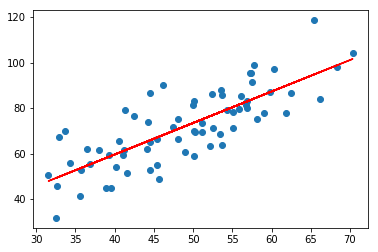

In [16]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, alg1.m*X_train + alg1.c,color="r")
plt.show()

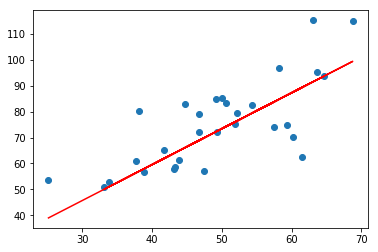

In [17]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,alg1.m*X_test + alg1.c,color="r")
plt.show()